# Polynomial regression
We will create a regression problem. The output Y (the "oracle" target function) is a cubic function ax^3 + bx^2 + cx + d with values a=-1, b=2, c=-3, d=4. Moreover, we sum some random noise withi a gaussian distribution.

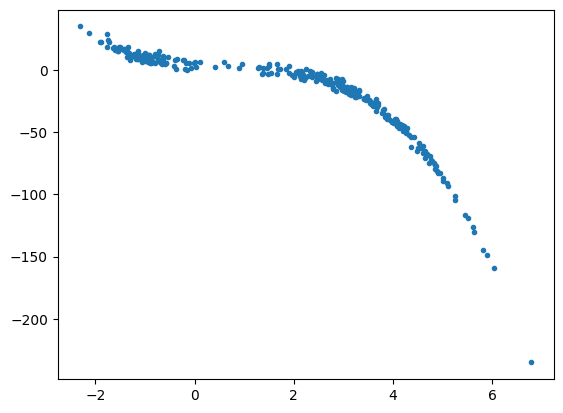

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

N = 100

# first feature for the first class
X1_1 = np.random.normal(loc=-1, scale=0.5, size=N)
# second feature for the first class
X1_2 = np.random.normal(loc=2.5, scale=1, size=N)
# third feature for the first class
X1_3 = np.random.normal(loc=4, scale=1, size=N)

# generate points for the second class 
# first feature for the second class
X2_1 = np.random.exponential(scale=3, size=N)
# second feature for the second class
X2_2 = np.random.lognormal(mean=0.5, sigma=0.5, size=N)
# third feature for the second class
X2_3 = np.random.poisson(lam=2, size=N) + 5

# stack vectors
X = np.stack((np.ones(N * 3),
              np.concatenate((X1_1, X1_2, X1_3)), 
              np.concatenate((X2_1, X2_2, X2_3))), 
             axis = 1)

X0 = np.ones(N*3)
X1 = np.concatenate((X1_1, X1_2, X1_3))
X_reg = np.stack((X0, X1, X1**2), axis=1)

# generate (oracle) quadratic target function
Y = -1 * X1**3 + 2 * X1**2 -3 * X1 + 4 + np.random.normal(loc=0, scale=2.5, size=X1.shape)

plt.plot(X[:,1], Y, '.')

### Find the optimal vector of parameters
In this case, we will try to find the optimal W using the closed form

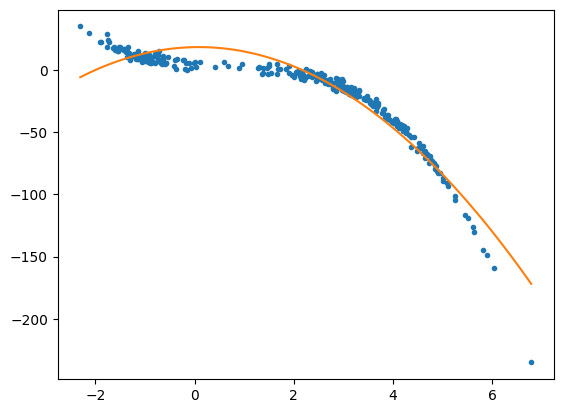

In [33]:
# find the closed form solution
# w = (X^T  X)^-1 (X^T y)
W = np.dot(np.linalg.inv(np.dot(X_reg.T, X_reg)), np.dot(X_reg.T, Y))

# plot points
plt.plot(X1, Y, '.')

# generate the grid of points
X_grid = np.linspace(np.min(X1), np.max(X1), 100)

# quadratic function
plt.plot(X_grid, X_grid**0 * W[0] + X_grid**1 * W[1] + X_grid**2 * W[2])